In [ ]:
#!pip install google-cloud-storage

In [1]:
import pandas as pd 
from google.cloud import storage
import io
import utils
from datetime import datetime
import os 


In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/home/lulu/projects/data-talks/data-engineering/nyc-collisions/nyc-collisions-analytics/mage/google_cloud_key.json"

The following uses the service account that is set in the GOOGLE_APPLICATION_CREDENTIALS

In [3]:
# Create a client to interact with the GCS service
client = storage.Client()

# Define your GCS bucket name and file name
bucket_name = 'nyc-collisions-bucket'
#file_name = 'raw_api_batched/nyc_collisions_2018_02_.parquet'
file_name = 'crash_data_spark_trans/processed_nyc_collisions_2017_02.parquet'

# Get the bucket containing the file
bucket = client.get_bucket(bucket_name)

# Get the blob (file) from the bucket
blob = bucket.blob(file_name)

# Download the file contents as a string
file_contents = blob.download_as_string()


In [4]:
df = pd.read_parquet(io.BytesIO(file_contents))

In [5]:
persons_df = df[['number_of_persons_injured','number_of_persons_killed']]
utils.nan_null_zero_datatypes(df)

,Column Name,# Non Zero Values,# NAs,# Blanks,# Zeros,# Data Types,Data Types
0,crash_date,15836,0,0,0,1,[<class 'datetime.date'>]
1,crash_time,15836,0,0,0,1,[<class 'str'>]
2,borough,10204,5632,0,0,2,"[<class 'str'>, <class 'NoneType'>]"
3,zip_code,10198,5638,0,0,1,[<class 'float'>]
4,latitude,14961,867,0,8,1,[<class 'float'>]
5,longitude,14961,867,0,8,1,[<class 'float'>]
6,on_street_name,12062,3774,0,0,2,"[<class 'str'>, <class 'NoneType'>]"
7,off_street_name,7835,8001,0,0,2,"[<class 'str'>, <class 'NoneType'>]"
8,number_of_persons_injured,2958,1,0,12877,1,[<class 'float'>]
9,number_of_persons_killed,12,3,0,15821,1,[<class 'float'>]


In [12]:
persons_df['number_of_persons_killed'].value_counts()

number_of_persons_killed
0.0    15821
1.0       11
2.0        1
Name: count, dtype: int64

<Axes: xlabel='crash_date'>

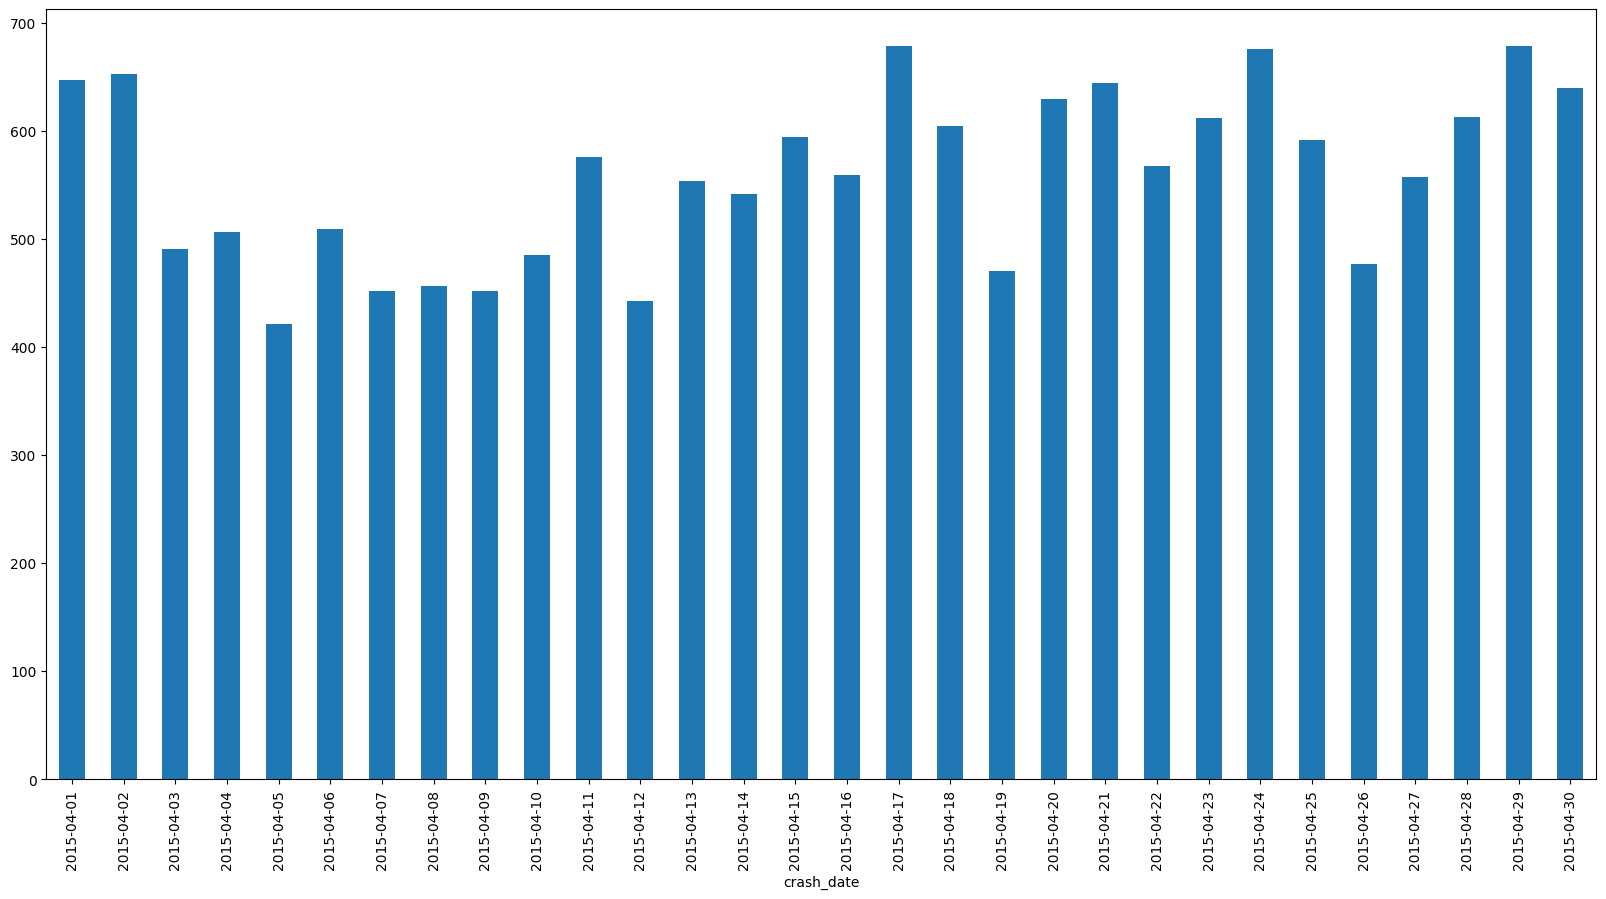

In [11]:
df['crash_date'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))

In [6]:
# Define a function to check if the date format is as expected
def is_valid_date_format(date_str):
    try:
        pd.to_datetime(date_str, format='%Y/%m/%d')
        return True
    except ValueError:
        return False

# Apply the function to create a mask for rows with invalid date format
mask = df['crash_date'].apply(lambda x: not is_valid_date_format(x))

# Print rows where the date format is not as expected
print(df[mask])

Empty DataFrame
Columns: [crash_date, crash_time, latitude, longitude, number_of_persons_injured, number_of_persons_killed, number_of_pedestrians_injured, number_of_pedestrians_killed, number_of_cyclist_injured, number_of_cyclist_killed, number_of_motorist_injured, number_of_motorist_killed, contributing_factor_vehicle_1, contributing_factor_vehicle_2, collision_id, vehicle_type_code1, vehicle_type_code2, cross_street_name, on_street_name, off_street_name, contributing_factor_vehicle_3, vehicle_type_code_3, borough, zip_code, contributing_factor_vehicle_4, contributing_factor_vehicle_5, vehicle_type_code_4, vehicle_type_code_5, crash_timestamp, sun_phase]
Index: []

[0 rows x 30 columns]


In [8]:
df.head(2)

,crash_date,crash_time,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_3,vehicle_type_code_3,borough,zip_code,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_4,vehicle_type_code_5,crash_timestamp,sun_phase
0,2015-04-29,19:10,40.649929,-73.933115,0,0,0,0,0,0,...,None,None,BROOKLYN,11203.0,None,None,None,None,2015-04-29 19:10:00,day
1,2015-04-30,08:45,40.712442,-73.894019,0,0,0,0,0,0,...,None,None,QUEENS,11379.0,None,None,None,None,2015-04-30 08:45:00,day


In [9]:
# Define a function to check if a value matches the format '%H:%M'
def is_valid_time(time_value):
    try:
        # Convert time_value to string before parsing
        datetime.strptime(str(time_value), '%H:%M:%S')
        return True
    except ValueError:
        return False

# Create a mask to filter rows where the time value does not match the format
mask = df['crash_time'].apply(is_valid_time)

# Apply the mask to the DataFrame to print only the rows with invalid time values
invalid_time_rows = df[~mask]
print(invalid_time_rows)


       crash_date crash_time   latitude  longitude  number_of_persons_injured  \
0      2015-04-29      19:10  40.649929 -73.933115                          0   
1      2015-04-30      08:45  40.712442 -73.894019                          0   
2      2015-04-27      17:00  40.767865 -73.738175                          0   
3      2015-04-28      00:30  40.705372 -73.803093                          0   
4      2015-04-26      14:00  40.711350 -73.961422                          0   
...           ...        ...        ...        ...                        ...   
16788  2015-04-13      10:54        NaN        NaN                          0   
16789  2015-04-13      02:40  40.718812 -73.832643                          0   
16790  2015-04-11      16:30  40.749053 -73.995749                          0   
16791  2015-04-03      18:30  40.637080 -74.013771                          0   
16792  2015-04-06      00:01  40.655829 -73.898596                          0   

       number_of_persons_ki

In [10]:
utils.nan_null_zero_datatypes(df)

,Column Name,# Non Zero Values,# NAs,# Blanks,# Zeros,# Data Types,Data Types
0,crash_date,16793,0,0,0,1,[<class 'datetime.date'>]
1,crash_time,16793,0,0,0,1,[<class 'str'>]
2,latitude,14233,2560,0,0,1,[<class 'float'>]
3,longitude,14233,2560,0,0,1,[<class 'float'>]
4,number_of_persons_injured,2821,0,0,13972,1,[<class 'int'>]
5,number_of_persons_killed,19,0,0,16774,1,[<class 'int'>]
6,number_of_pedestrians_injured,680,0,0,16113,1,[<class 'int'>]
7,number_of_pedestrians_killed,7,0,0,16786,1,[<class 'int'>]
8,number_of_cyclist_injured,302,0,0,16491,1,[<class 'int'>]
9,number_of_cyclist_killed,2,0,0,16791,1,[<class 'int'>]
